In [1]:
#import packages
import ezc3d
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
#set path and read the csv for the POI Data
poi_path = '/Users/leofeingold/Documents/GitHub/openbiomechanics/baseball_hitting/data/poi/poi_metrics.csv'
poi_metrics = pd.read_csv(poi_path)

#set path and read the csv for the HitTrax Data
hittrax_path = '/Users/leofeingold/Documents/GitHub/openbiomechanics/baseball_hitting/data/poi/hittrax.csv'
hittrax_metrics = pd.read_csv(hittrax_path)

#Merge the data by session swing so it lines up correctly
merged_data = pd.merge(poi_metrics, hittrax_metrics, on='session_swing', how='inner')

In [3]:
#perform regression:
#assign varibale x and y for simplicty in regression
x = merged_data['exit_velo_mph_x'].values.reshape(-1, 1)
y = merged_data['la'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict values using the model
x_values = np.linspace(x.min(), x.max(), 100).reshape(-1, 1) #creates numpy array for 100 x values between the xMin and xMax and reshapes it into a 1 column by however many rows are neccesary
y_values = model.predict(x_values) #predict the values using the regression


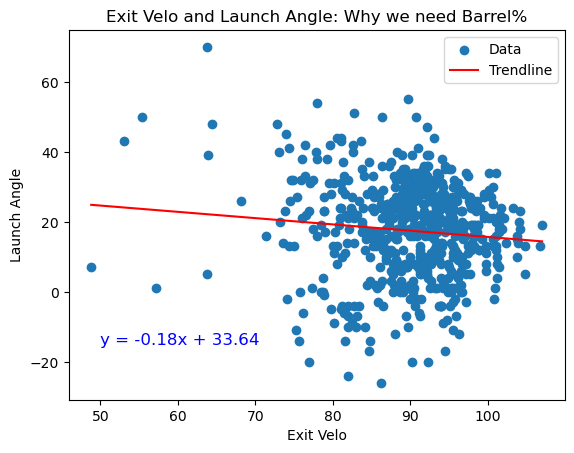

In [4]:
# Add the formula for the line GRAPH: WHY WE NEED BARREL%
plt.text(50,-15, f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}', fontsize=12, color='blue')
plt.scatter(merged_data['exit_velo_mph_x'], merged_data['la'], label='Data')
plt.plot(x_values, y_values, color='red', label='Trendline')
plt.xlabel('Exit Velo')
plt.ylabel('Launch Angle')
plt.title('Exit Velo and Launch Angle: Why we need Barrel%')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


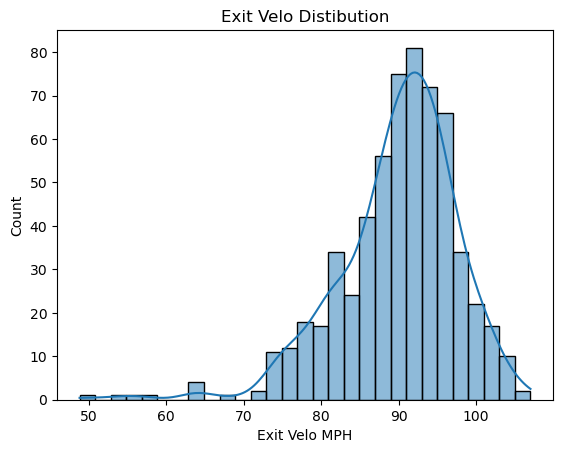

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


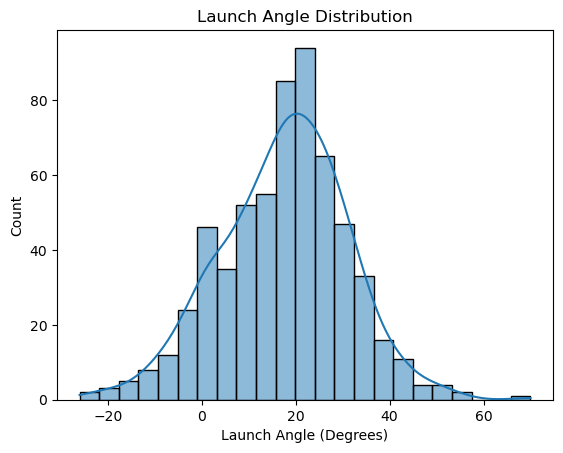

In [15]:
sns.histplot(merged_data['exit_velo_mph_x'], kde=True)
plt.title('Exit Velo Distibution')
plt.xlabel('Exit Velo MPH')
plt.show()

sns.histplot(merged_data['la'], kde=True)
plt.title('Launch Angle Distribution')
plt.xlabel('Launch Angle (Degrees)')
plt.show()

In [23]:
correlationsEVLA = merged_data.corr(numeric_only=True)[['exit_velo_mph_x', 'la']]
correlationsEVLA = abs(correlationsEVLA)

# Calculate the sum of the absolute correlations for EV and LA for each variable
correlationsEVLA['combined'] = correlationsEVLA.sum(axis=1)

# Sort the variables by the combined correlation in descending order
combined_correlations_sorted = correlationsEVLA['combined'].sort_values(ascending=False)

print("Top variables correlated with EV and LA combined:")
print(combined_correlations_sorted.head(20))

Top variables correlated with EV and LA combined:
dist                                    1.124776
exit_velo_mph_x                         1.101329
la                                      1.101329
bat_speed_mph_max_x                     0.834042
bat_speed_mph_contact_x                 0.818359
sweet_spot_velo_mph_contact_x           0.769921
blast_bat_speed_mph_x                   0.712841
bat_speed_xy_max_x                      0.709083
sweet_spot_velo_mph_contact_z           0.547870
hand_speed_blast_bat_mph_max_x          0.529133
attack_angle_contact_x                  0.499043
sweet_spot_velo_mph_contact_y           0.421641
pelvis_angular_velocity_stride_max_x    0.404600
pelvis_angular_velocity_fp_x            0.397045
upper_arm_speed_mag_seq_max_x           0.363498
upper_arm_speed_mag_swing_max_velo_x    0.363498
upper_arm_speed_mag_max_x               0.363498
torso_angular_velocity_fp_x             0.338929
torso_angular_velocity_stride_max_x     0.330088
torso_angular_veloc

0.22297606854642243